In [2]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [4]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

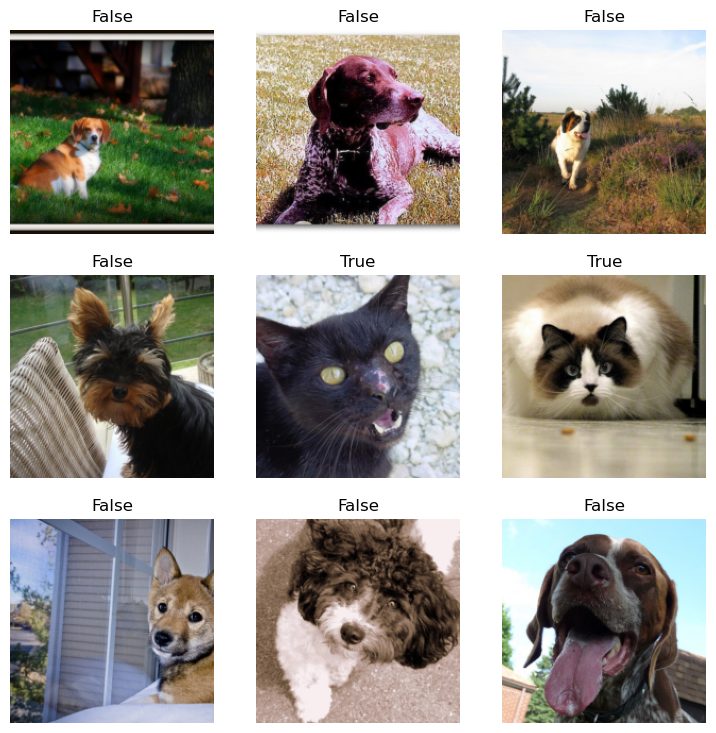

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/imac/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/imac/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/imac/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:09<00:00, 4.99MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.186127,0.050841,0.331529,04:38


epoch,train_loss,valid_loss,error_rate,time
0,0.077016,0.075883,0.331529,06:29
1,0.041144,0.027862,0.331529,07:35
2,0.024074,0.028237,0.331529,07:33


In [8]:
learn.export('model.pkl')